In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_csv("data/train.csv")

df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Examine the usual suspects: head, tail, unique values etc.
# Show the first 5 rows
print(df.head())

# Show the last 5 rows
print(df.tail())

# Show summary info (including datatypes and non-null counts)
print(df.info())

# Show basic statistics for numerical columns
print(df.describe())

# List all column names
print(df.columns)

# Get the number of unique values per column
print(df.nunique())

# Check for missing values per column
print(df.isnull().sum())

   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]
        ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1 

In [6]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

In [7]:
# Display the shape
print("Shape:", df.shape)

# Display the columns
print("Columns:", df.columns)

# Display info
print("Info:")
df.info()

Shape: (4209, 378)
Columns: Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


float: Columns with decimal numbers (e.g., 3.14, 2.0).

int: Columns with whole numbers (e.g., 1, 42, -7).

object: Columns with text, strings, or mixed types (e.g., 'abc', 'k', categorical data).

In [10]:
# ========== 1. Correlation Table with Target y ==========
correlations = df.corr(numeric_only=True)['y'].drop('y').sort_values(ascending=False)

top_corr_table = correlations.head(15).reset_index()
top_corr_table.columns = ['Feature', 'Correlation_with_y']

bottom_corr_table = correlations.tail(15).reset_index()
bottom_corr_table.columns = ['Feature', 'Correlation_with_y']

print("=== Top 15 Positive Correlations with y ===")
print(top_corr_table, "\n")

print("=== Top 15 Negative Correlations with y ===")
print(bottom_corr_table, "\n")


# ========== 2. Categorical Summary Table ==========
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

categorical_summary = {}
for col in cat_features:
    summary = df.groupby(col)['y'].agg(['count','mean']).sort_values('mean', ascending=False)
    categorical_summary[col] = summary
    print(f"\n=== Summary for {col} ===")
    print(summary.head(10))  # show top 10 categories by mean y


# ========== 3. Low-Variance Feature Table ==========
numeric_features = df.drop(columns=['ID','y'] + cat_features).columns

feature_variance = df[numeric_features].var().sort_values()
low_variance_table = feature_variance[feature_variance == 0].reset_index()
low_variance_table.columns = ['Feature', 'Variance']

print("\n=== Low-Variance Features (Variance = 0, likely removable) ===")
print(low_variance_table)

=== Top 15 Positive Correlations with y ===
   Feature  Correlation_with_y
0     X314            0.606005
1     X261            0.588785
2     X263            0.379629
3     X136            0.368177
4     X275            0.275042
5     X119            0.272728
6     X118            0.272728
7      X51            0.229999
8     X264            0.228169
9     X126            0.223975
10    X179            0.218034
11    X130            0.216763
12    X311            0.210318
13     X66            0.201035
14    X198            0.195290 

=== Top 15 Negative Correlations with y ===
   Feature  Correlation_with_y
0     X279           -0.379629
1     X232           -0.379629
2     X127           -0.510620
3      X11                 NaN
4      X93                 NaN
5     X107                 NaN
6     X233                 NaN
7     X235                 NaN
8     X268                 NaN
9     X289                 NaN
10    X290                 NaN
11    X293                 NaN
12    X297 

### 📊 What this produces:
	1.	Top & bottom 15 correlations with y → shows most relevant features.
	2.	Categorical summary table → count + mean target value for each category.
	3.	Low-variance table → features with zero variance (same value everywhere, can be dropped).

---

In [12]:
import pandas as pd

# Load the datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Inspect the datasets
train_shape = train.shape
test_shape = test.shape
train_head = train.head()
train_info = train.info()
train_description = train.describe()

train_shape, test_shape, train_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


((4209, 378),
 (4209, 377),
    ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
 0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
 1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
 2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
 3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
 4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   
 
    X380  X382  X383  X384  X385  
 0     0     0     0     0     0  
 1     0     0     0     0     0  
 2     0     1     0     0     0  
 3     0     0     0     0     0  
 4     0     0     0     0     0  
 
 [5 rows x 378 columns])

# Here’s what the Exploratory Data Analysis (EDA) reveals from train.csv:

🔎 Findings
	1.	Target (y):

	•	Distribution is slightly right-skewed (some high outliers).

	•	Most values are between 70–130.

	2.	Categorical variables (X0–X8):

	•	Different numbers of categories (some with many distinct values).

	•	Uneven distributions — some categories dominate.

	3.	Binary numeric features (X10…X385):

	•	Most are sparse (mostly zeros).

	•	Some have meaningful variance.

	4.	Correlation with target y:

	•	Strongest positive correlations:

	•	X314 (0.61), X261 (0.59), X263 (0.38).

	•	Strongest negative correlation:

	•	X127 (-0.51).

	•	Many features have NaN correlation (constant features → no variance).
	

⸻

✅ Useful tables for correlations & EDA:

	•	Correlation table: Top 15 positive & negative correlations with y.

	•	Categorical summary table: Category counts & mean target value per category.

	•	Variance table: Identify low-variance binary features (to drop).


---

For Exploratory Data Analysis (EDA), we want to:

	1.	Distribution of target y → histogram + summary stats.

	2.	Categorical variables → frequency counts, bar plots.

	3.	Numeric variables → histograms for selected features.

	4.	Correlation matrix for numeric variables → identify relationships with y.

	5.	Variance & sparsity check → many features are binary, we should check variance.
	

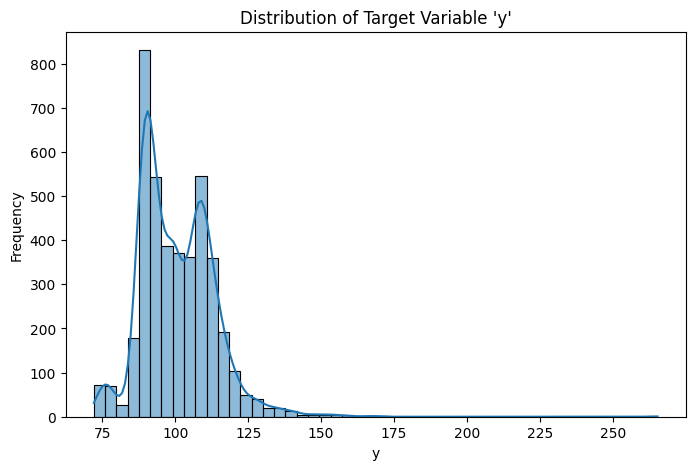

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train['y'], bins=50, kde=True)
plt.title("Distribution of Target Variable 'y'")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.show()


=== Summary for X0 ===
    count        mean
X0                   
aa      2  152.170000
au     11  118.695455
ap    103  116.577864
a      21  115.630952
as     10  115.349000
r      10  113.914000
at     25  113.465200
af     35  112.791143
w     182  112.614121
x     300  112.555333


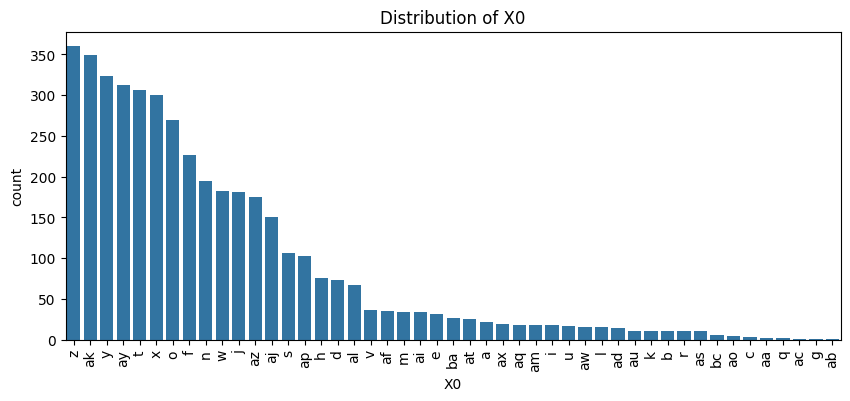


=== Summary for X1 ===
    count        mean
X1                   
e      33  107.337879
k      17  106.800000
i     203  105.727488
p       9  105.568889
f      23  104.522609
h      29  103.672759
g       6  103.191667
m      32  102.788750
j      22  102.489545
n      19  102.463158


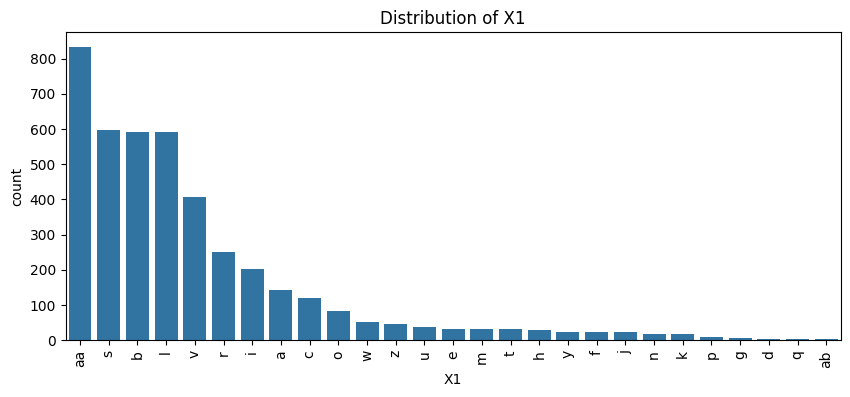


=== Summary for X2 ===
    count        mean
X2                   
aa      1  146.300000
ar      1  131.980000
am      1  122.510000
s      94  116.977447
k      25  114.950400
al      5  113.362000
ah      4  112.947500
ap     11  112.791818
ao     20  112.512000
g      12  112.280833


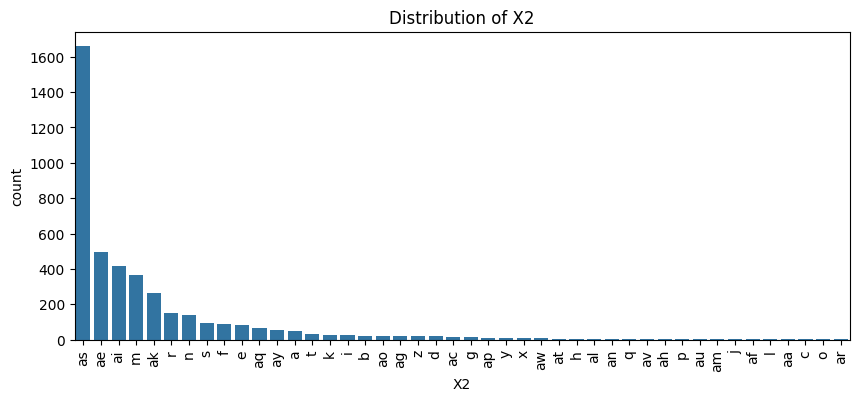


=== Summary for X3 ===
    count        mean
X3                   
d     290  105.114414
a     440  102.507477
c    1942  101.959269
g     241  100.428672
b      57  100.239649
e     163  100.033190
f    1076   96.564507


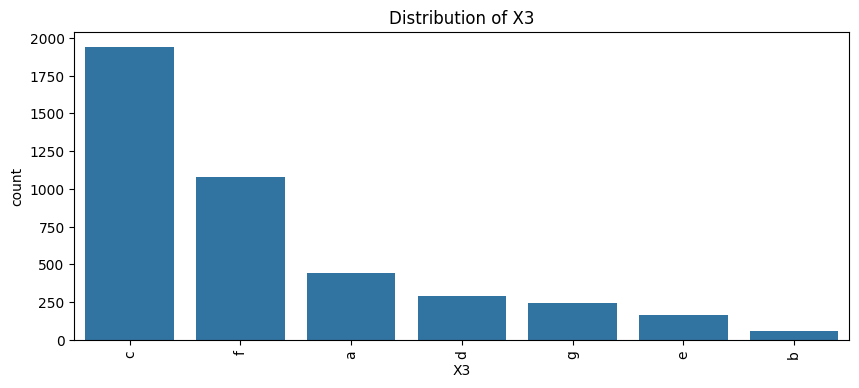


=== Summary for X4 ===
    count        mean
X4                   
c       1  134.040000
b       1  112.800000
a       2  101.100000
d    4205  100.658293


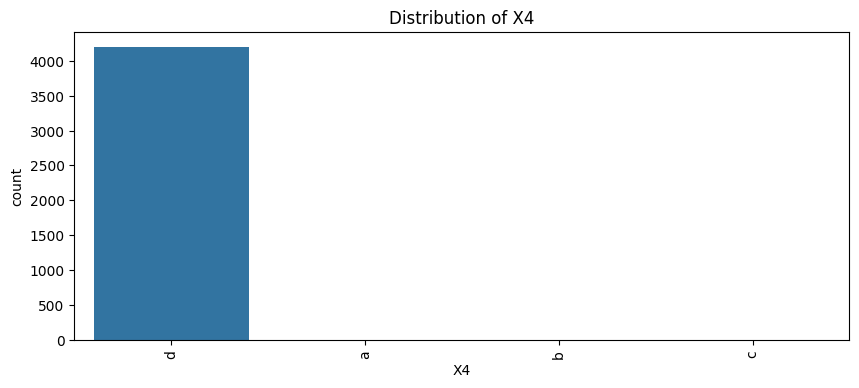


=== Summary for X5 ===
    count        mean
X5                   
u       1  130.810000
f       7  105.594286
ag    204  102.920147
n     212  102.594104
ab    197  102.503655
c     131  102.343130
m     208  101.768317
ad    185  101.493189
af    188  101.246968
i     207  100.994010


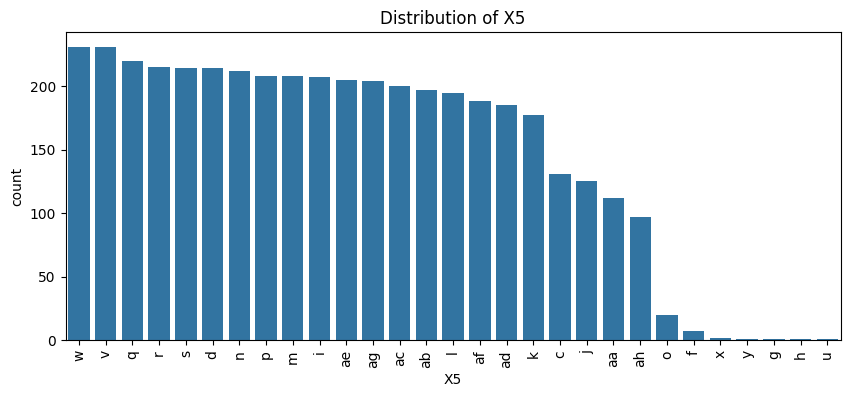


=== Summary for X6 ===
    count        mean
X6                   
e      12  109.751667
c      38  103.728421
h     190  103.134842
k      43  102.074884
d     625  101.346464
i     488  101.226803
j    1039  101.165245
g    1042  100.306286
l     478   98.945502
b      28   98.714286


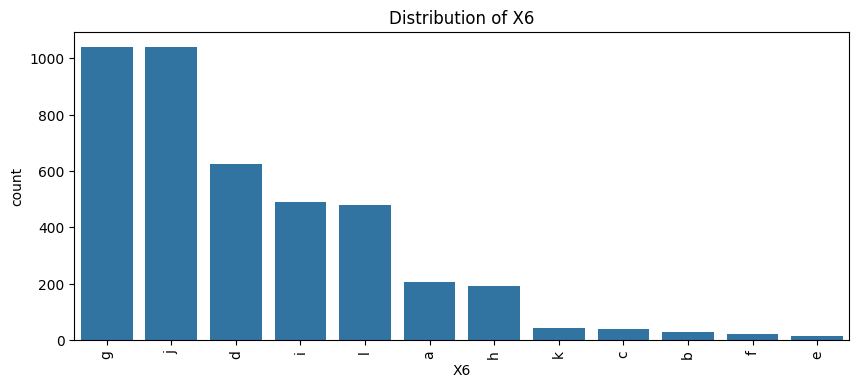


=== Summary for X8 ===
    count        mean
X8                   
e     225  104.976311
r     219  103.610548
h     117  103.446154
i     237  103.113418
q     117  102.551197
n     242  102.194215
v     194  101.943351
t     119  101.492017
y     116  101.435086
u     119  101.156723


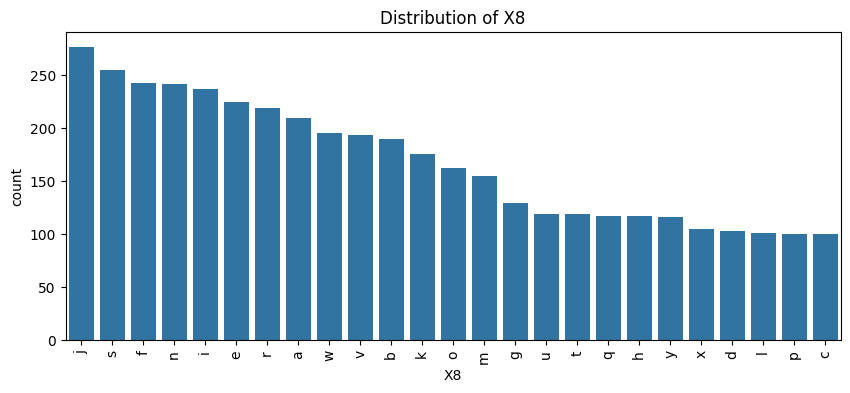

In [25]:
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cat_features:
    # === Summary table ===
    summary = train.groupby(col)['y'].agg(['count','mean']).sort_values('mean', ascending=False)
    print(f"\n=== Summary for {col} ===")
    print(summary.head(10))  # show top 10 categories by mean y

    # === Plot ===
    plt.figure(figsize=(10,4))
    sns.countplot(x=train[col], order=train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

## let’s adjust the code so that the bar plots are ordered by the mean target y instead of just raw frequency.

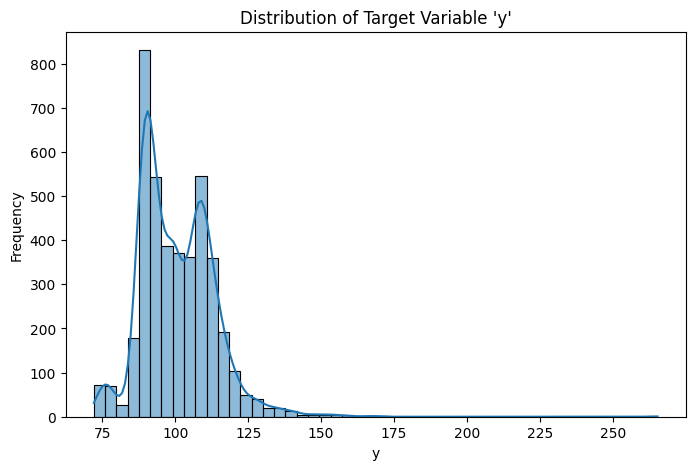

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(train['y'], bins=50, kde=True)
plt.title("Distribution of Target Variable 'y'")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.show()


=== Summary for X0 ===
    count        mean
X0                   
aa      2  152.170000
au     11  118.695455
ap    103  116.577864
a      21  115.630952
as     10  115.349000
r      10  113.914000
at     25  113.465200
af     35  112.791143
w     182  112.614121
x     300  112.555333


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


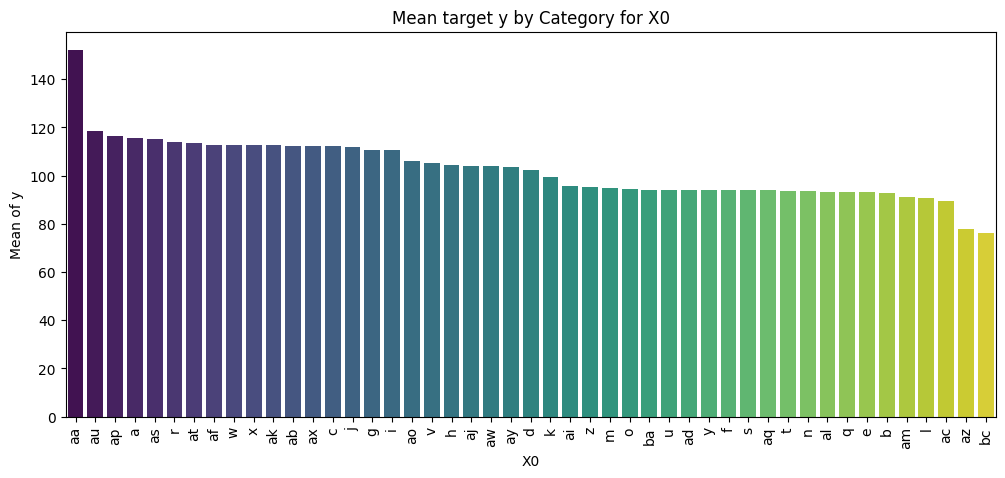


=== Summary for X1 ===
    count        mean
X1                   
e      33  107.337879
k      17  106.800000
i     203  105.727488
p       9  105.568889
f      23  104.522609
h      29  103.672759
g       6  103.191667
m      32  102.788750
j      22  102.489545
n      19  102.463158


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


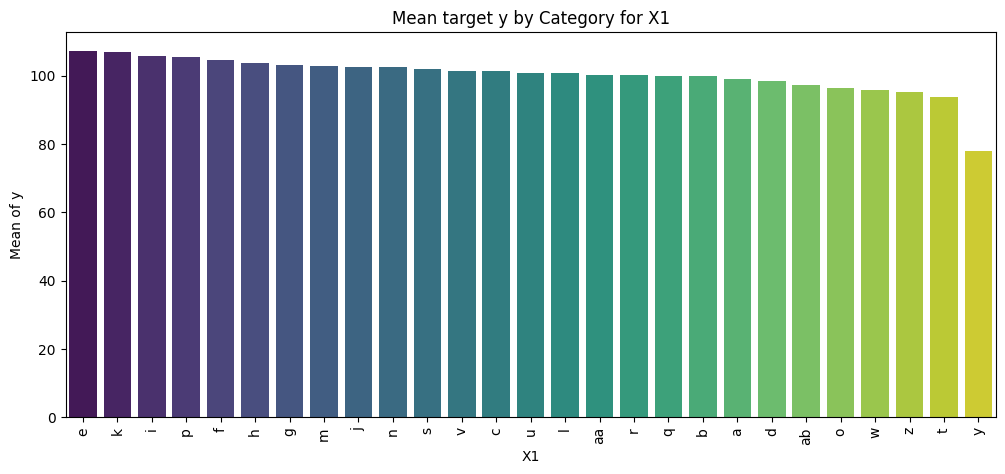


=== Summary for X2 ===
    count        mean
X2                   
aa      1  146.300000
ar      1  131.980000
am      1  122.510000
s      94  116.977447
k      25  114.950400
al      5  113.362000
ah      4  112.947500
ap     11  112.791818
ao     20  112.512000
g      12  112.280833


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


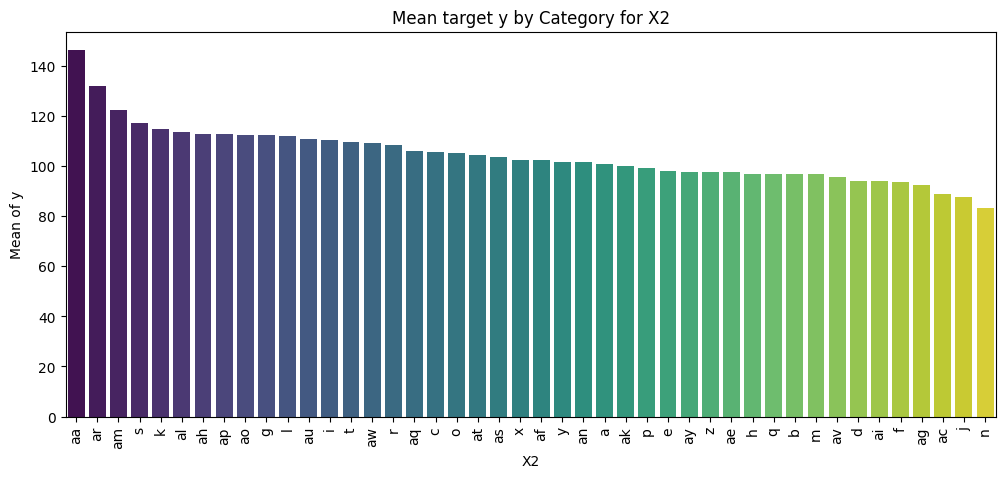


=== Summary for X3 ===
    count        mean
X3                   
d     290  105.114414
a     440  102.507477
c    1942  101.959269
g     241  100.428672
b      57  100.239649
e     163  100.033190
f    1076   96.564507


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


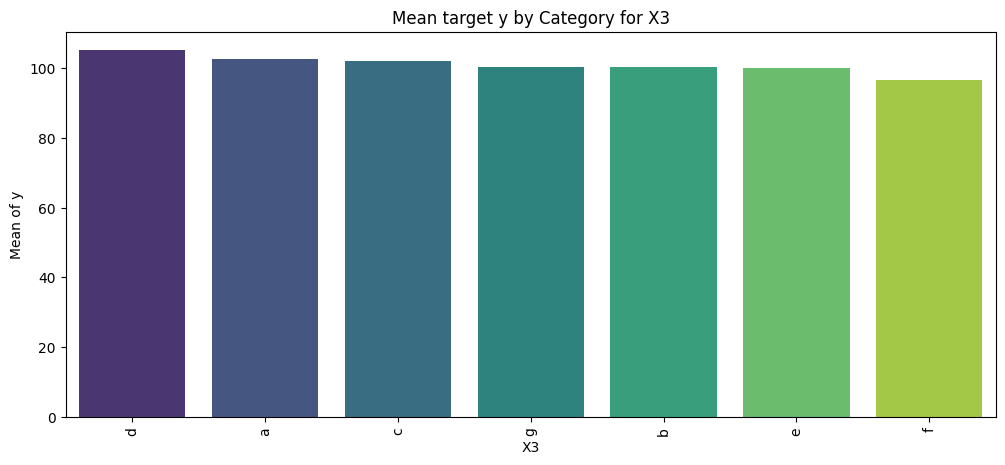


=== Summary for X4 ===
    count        mean
X4                   
c       1  134.040000
b       1  112.800000
a       2  101.100000
d    4205  100.658293


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


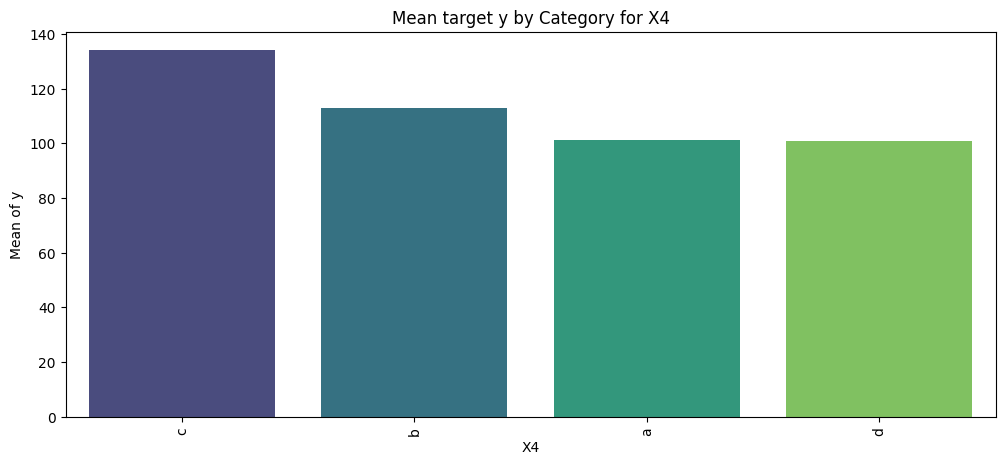


=== Summary for X5 ===
    count        mean
X5                   
u       1  130.810000
f       7  105.594286
ag    204  102.920147
n     212  102.594104
ab    197  102.503655
c     131  102.343130
m     208  101.768317
ad    185  101.493189
af    188  101.246968
i     207  100.994010


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


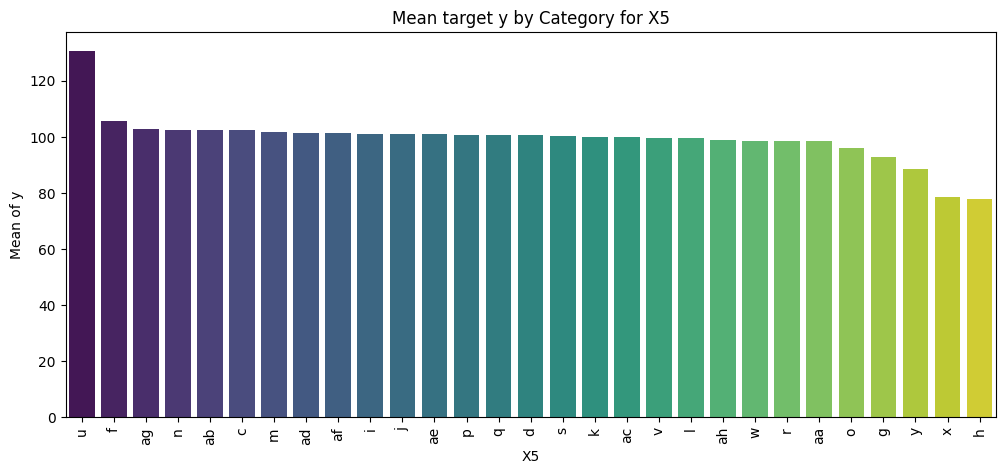


=== Summary for X6 ===
    count        mean
X6                   
e      12  109.751667
c      38  103.728421
h     190  103.134842
k      43  102.074884
d     625  101.346464
i     488  101.226803
j    1039  101.165245
g    1042  100.306286
l     478   98.945502
b      28   98.714286


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


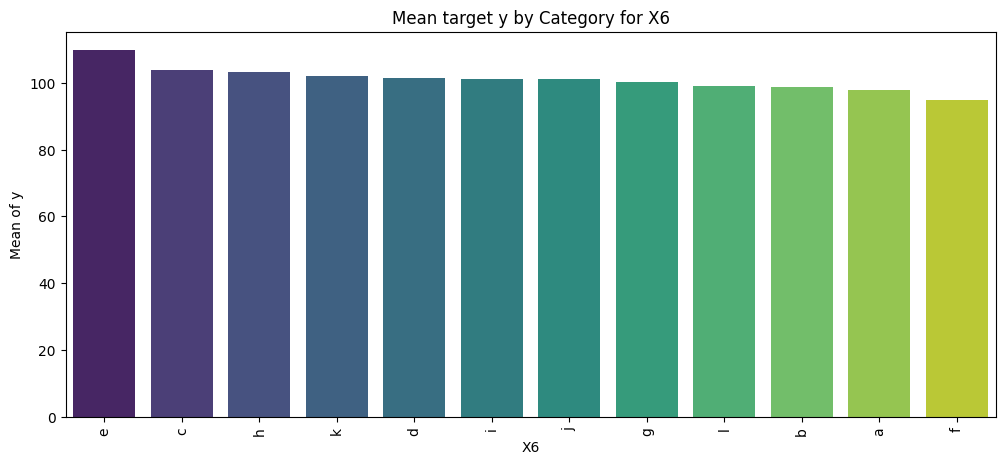


=== Summary for X8 ===
    count        mean
X8                   
e     225  104.976311
r     219  103.610548
h     117  103.446154
i     237  103.113418
q     117  102.551197
n     242  102.194215
v     194  101.943351
t     119  101.492017
y     116  101.435086
u     119  101.156723


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


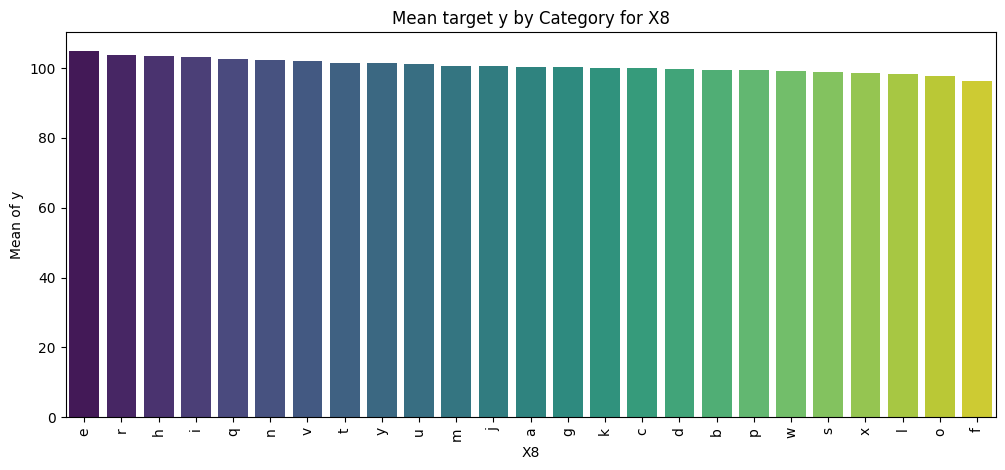

In [30]:
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cat_features:
    # === Summary table ===
    summary = train.groupby(col)['y'].agg(['count','mean']).sort_values('mean', ascending=False)
    print(f"\n=== Summary for {col} ===")
    print(summary.head(10))  # top 10 categories by mean y

    # === Plot (sorted by mean y) ===
    ordered_categories = summary.index  # sorted by mean
    plt.figure(figsize=(12,5))
    sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")
    plt.title(f"Mean target y by Category for {col}")
    plt.ylabel("Mean of y")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

## 📌 Overall Observations
	•	X0 and X2 show the strongest variation in production time → key predictors.
	•	X1, X5, X6, X8 also contain meaningful signal.
	•	X3 and X4 show smaller variation, though some rare categories have extreme values (risk of overfitting).
	•	Rare categories (count = 1–5) often have extreme means → should be handled carefully (e.g., grouped or smoothed).

# PIPELINE
### Ridge Regresion

In [38]:
# ==============================
# Mercedes Benz Greener Mfg - Baseline Pipeline (Ridge Regression)
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
train = pd.read_csv("data/train.csv")

# ----------------------------
# 2. Preprocessing & Feature Engineering
# ----------------------------

# Drop ID
train = train.drop("ID", axis=1)

# Separate target
y = train["y"]
X = train.drop("y", axis=1)

# Identify categorical variables
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

# Drop constant / zero-variance features
constant_features = [col for col in X.columns if X[col].nunique() == 1]
X = X.drop(columns=constant_features)

# One-hot encode categorical features
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# Log-transform target
y_log = np.log1p(y)

# ----------------------------
# 3. Train/Validation Split
# ----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# ----------------------------
# 4. Scaling (important for linear models)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ----------------------------
# 5. Ridge Regression Training
# ----------------------------
ridge_model = Ridge(alpha=10, random_state=42)  # alpha = regularization strength
ridge_model.fit(X_train_scaled, y_train)

# ----------------------------
# 6. Evaluation
# ----------------------------
y_pred_val = ridge_model.predict(X_val_scaled)

rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f"\nValidation RMSE: {rmse:.4f}")
print(f"Validation R²: {r2:.4f}")


Validation RMSE: 0.0752
Validation R²: 0.6074


# PIPELINE
### LightGMB

In [39]:
# ==============================
# Mercedes Benz Greener Mfg - Baseline Pipeline
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import lightgbm as lgb

# 1. Load dataset
train = pd.read_csv("train.csv")

# ----------------------------
# 2. Preprocessing & Feature Engineering
# ----------------------------

# Drop ID
train = train.drop("ID", axis=1)

# Separate target
y = train["y"]
X = train.drop("y", axis=1)

# Identify categorical variables
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

# Drop constant / zero-variance features
constant_features = [col for col in X.columns if X[col].nunique() == 1]
X = X.drop(columns=constant_features)

# One-hot encode categorical features
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# Log-transform target
y_log = np.log1p(y)

# ----------------------------
# 3. Train/Validation Split
# ----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# ----------------------------
# 4. LightGBM Model Training
# ----------------------------
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 32,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=2000,
    early_stopping_rounds=100,
    verbose_eval=100
)

# ----------------------------
# 5. Evaluation
# ----------------------------
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f"\nValidation RMSE: {rmse:.4f}")
print(f"Validation R²: {r2:.4f}")

OSError: dlopen(/Users/raulguzman/Desktop/AIPM/mercedes/.venv/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib
  Referenced from: <D44045CD-B874-3A27-9A61-F131D99AACE4> /Users/raulguzman/Desktop/AIPM/mercedes/.venv/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.dylib
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/Users/raulguzman/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/raulguzman/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/Users/raulguzman/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/raulguzman/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)

# datos

=== Low-Variance Features (Variance = 0, likely removable) ===
   Feature  Variance
0     X233       0.0
1      X11       0.0
2     X107       0.0
3     X293       0.0
4     X290       0.0
5     X330       0.0
6      X93       0.0
7     X268       0.0
8     X297       0.0
9     X235       0.0
10    X347       0.0
11    X289       0.0
12    X4

## one hot encoding

In [49]:
# ==============================
# Preprocessing for Mercedes Benz Dataset (EDA + Modeling)
# ==============================

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

def load_and_encode(train_path="train.csv", test_path="test.csv"):
    # 1. Load datasets
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)

    # Drop ID for modeling/EDA (keep a copy if needed later for submission)
    train_ID = train["ID"]
    test_ID = test["ID"]
    train = train.drop("ID", axis=1)
    test = test.drop("ID", axis=1)

    # Separate target
    y = train["y"]
    X = train.drop("y", axis=1)

    # Identify categorical and numeric features
    categorical_features = ['X0','X1','X2','X3','X4','X5','X6','X8']
    numeric_features = [col for col in X.columns if col not in categorical_features]

    # 2. Define preprocessing: OneHotEncode only categorical vars
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), categorical_features),
            ('num', 'passthrough', numeric_features)
        ]
    )

    # 3. Fit transformer on TRAIN and transform both train & test
    X_encoded = preprocessor.fit_transform(X)
    test_encoded = preprocessor.transform(test)

    # 4. Get feature names after encoding
    cat_ohe = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
    final_features = cat_ohe + numeric_features

    # Convert to DataFrames
    X_encoded_df = pd.DataFrame(X_encoded, columns=final_features, index=X.index)
    test_encoded_df = pd.DataFrame(test_encoded, columns=final_features, index=test.index)

    return X_encoded_df, y, test_encoded_df, train_ID, test_ID, final_features


# Example usage:
X_encoded, y, test_encoded, train_ID, test_ID, feature_names = load_and_encode("data/train.csv", "data/test.csv")

print("Transformed train shape:", X_encoded.shape)
print("Transformed test shape:", test_encoded.shape)
print("Number of features after OHE:", len(feature_names))

Transformed train shape: (4209, 555)
Transformed test shape: (4209, 555)
Number of features after OHE: 555


/Users/raulguzman/Desktop/AIPM/mercedes/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
